<a href="https://colab.research.google.com/github/CarlosPuenteL/Python-ML/blob/main/Regresion%20lineal%20multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as graph



In [5]:
import pandas as pd



In [6]:
import statsmodels.formula.api as smf

In [9]:
%matplotlib inline
graph.rcParams['figure.figsize']=(15,5)

In [25]:
import statsmodels.formula.api as smf

In [20]:
dataset = pd.read_csv('/content/chocolate data multiple linear regression.txt',index_col=False, sep="\t",header=0)

In [21]:
print(dataset.head())

   weight  cocoa_percent   cost  customer_happiness
0     247           0.11   0.25                  29
1     192           0.82  10.44                  29
2     106           0.01   0.00                   6
3      78           0.04   0.01                   4
4     213           0.39   2.56                  30


In [32]:
formula = 'costumer_happiness ~ weight'

#si solo defines esto aquí, entonces no va a reconocerlo la siguiente pieza del 
#código, es como si fueran dos mini codigos separados

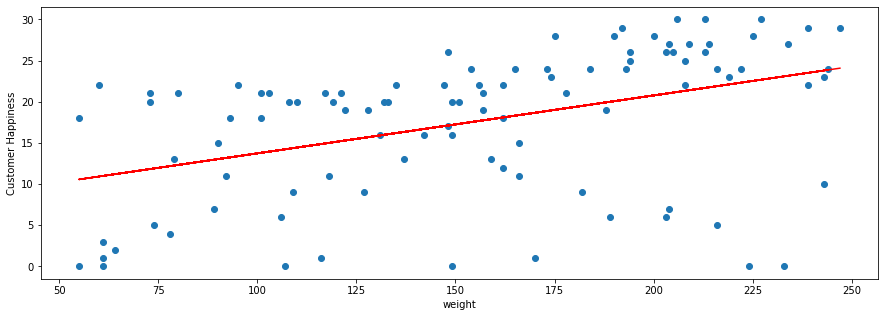

In [31]:
###
# REPLACE <addFeatureHere> BELOW WITH weight
###
formula = 'customer_happiness ~ weight'
###

# This performs linear regression
lm = smf.ols(formula = formula, data = dataset).fit()

featureName = formula.split(" ")[-1]

# Get the data for the x parameter (the feature)
x = dataset[featureName]

# This makes and shows a graph
intercept = lm.params[0]
slope = lm.params[1]
line = slope * x + intercept
graph.plot(x, line, '-', c = 'red')
graph.scatter(x, dataset.customer_happiness)
graph.ylabel('Customer Happiness')
graph.xlabel(featureName)
graph.show()

In [33]:
print(lm.rsquared)

0.1887701234022121


In [36]:
formula = 'customer_happiness ~ weight + cocoa_percent + cost'
###

# This creates a new model with all three features
lm = smf.ols(formula = formula, data = dataset).fit()

# Print the coefficients (slopes) of our new model
print(lm.params)

print("R²: " + str(lm.rsquared))

Intercept        -9.338917
weight            0.106411
cocoa_percent    31.935786
cost             -1.314457
dtype: float64
R²: 0.5554156557713101


In [37]:
print(formula)

customer_happiness ~ weight + cocoa_percent + cost


In [39]:
print(str(lm))

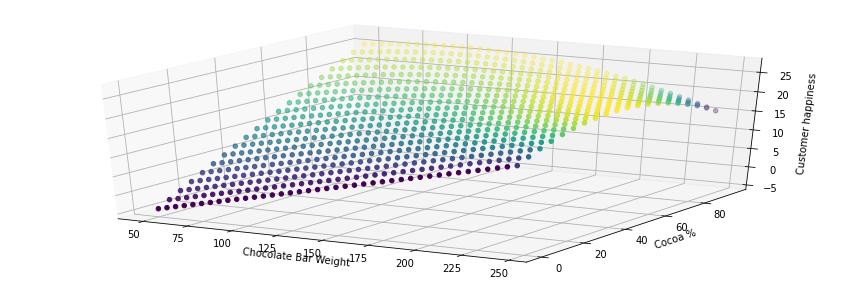

In [40]:
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
def CalculateCustomerHappiness(weight, cocoa_percent):
    # This calculates the customer happiness for a given bar of chocolate
    cocoa_fraction = cocoa_percent / 100
    cost = (weight * 0.05 + weight * cocoa_fraction)**2 * 0.0004
    
    # First coefficient
    coeff_intercept = lm.params[0]
    
    # Second coefficient
    coeff_weight = lm.params[1]
    
    # Third coefficient
    coeff_cocoa = lm.params[2]
    
    # Fourth coefficient
    coeff_cost = lm.params[3]
    
    ### 
    # REPLACE THE <addThirdCoefHere> AND <addFourthCoefHere> BELOW WITH THE THIRD AND FOURTH COEFFICIENTS
    # YOU'LL FIND THEM JUST ABOVE THESE COMMENTS!
    # THE FIRST TWO HAVE ALREADY BEEN COMPLETED FOR YOU
    ###
    customer_happiness = (coeff_intercept) + (weight * coeff_weight) + (cocoa_fraction * coeff_cocoa) + (cost * coeff_cost)
    ###
    
    return customer_happiness
       
    
# Don't edit this part! This creates our graph.
def Graph3d():
    # This creates a 3D graph of likely customer happiness with different types of chocolate bar
    fig = graph.figure()
    ax = fig.add_subplot(111, projection='3d')

    cocoaPercentages=range(0,100,5)
    for weight in range(50,250,5):
        happiness=[]
        for cocoa in cocoaPercentages:
            happiness.append(CalculateCustomerHappiness(weight,cocoa))

        ax.scatter(np.full(len(happiness),weight), cocoaPercentages, happiness,c=happiness)

    ax.set_xlabel('Chocolate Bar Weight')
    ax.set_ylabel('Cocoa %')
    ax.set_zlabel('Customer happiness')

    graph.show()
    
Graph3d()